In [347]:
#Import Libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importation

In [348]:
#Load datasets
df_train = pd.read_csv(r'C:\Users\okwye\Office Tool\OneDrive\Desktop\train_big_mart_sales_prediction.csv')
df_test = pd.read_csv(r'C:\Users\okwye\Office Tool\OneDrive\Desktop\test_big_mart_sales_prediction.csv')

In [349]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [350]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Preparation

In [351]:
#Checking the train dataset frame
df_train.shape

(8523, 12)

In [352]:
#Checking the train dataset frame
df_test.shape

(5681, 11)

In [353]:
#Checking null values in the train dataframe
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [354]:
#Checking null values in the train dataframe
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [355]:
#Obtain information about the structure and data types of a DataFrames
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [356]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [357]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Item_Weight is a numerical column, therefore we fill the null values with mean imputation

In [358]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [359]:
#Fill the null values in the Item_Weight column with mean values of the column
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)



In [360]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Outlet_Size is a categorical column, therefore we fill the null values with mode imputation

In [361]:
#Outlet_Size column value count check
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [362]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [363]:
#Fill the null values in the Outlet_Size column with mode values of the column
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

In [364]:
#Run a check
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [365]:
#Run a check
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Transformation and some exploration

Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


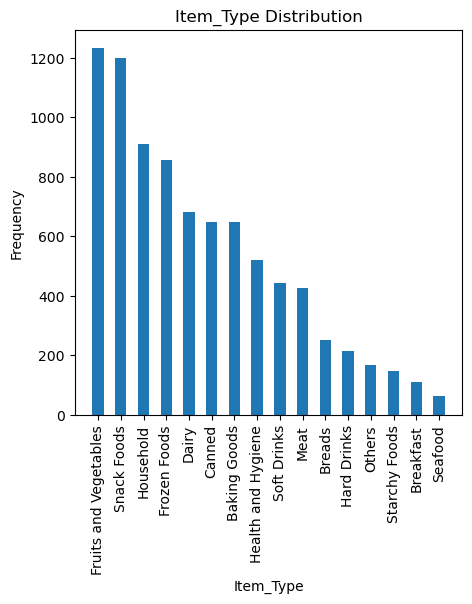

In [366]:
# Count the occurrences of each unique value in the 'Item_Type' column of the dataframe 'df_train'
df_train['Item_Type'].value_counts()

# Create a bar plot using the counts of each item type
plt.bar(df_train['Item_Type'].value_counts().index, df_train['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df_train)

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Item_Type Distribution')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')

#Rotate the x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Print the item type counts
print('Item_Type:\n',df_train['Item_Type'].value_counts())

In [367]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### From the above data frame, the 'Item_Identifier' column gave us a clue about the Items in 'Item_Type' column. We considered FD = Food, DR = Drinks and NC = Non Consumables. We created new column 'Item_Types' and asign the the new values into it.

In [368]:
#Categorizing the Item_Type column into 'Non Consumables', 'Drinks' and 'Foods' in accordance with the Item_Identifier column
def item_identify(cols):
  item_id=cols[0]
  item_type=cols[1]
  
  if item_id[:2] == 'NC':
    return 'Non Consumables'
  elif item_id[:2] == 'DR':
    return 'Drinks'
  else:
    return 'Foods'
    


In [369]:
#Creating additional column 'Item_Types' into the train and test dataset
df_train['Item_Types']=df_train[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
df_test['Item_Types']=df_test[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

In [370]:
# Get the value counts of 'Item_Types' column
df_train['Item_Types'].value_counts()

Foods              6125
Non Consumables    1599
Drinks              799
Name: Item_Types, dtype: int64

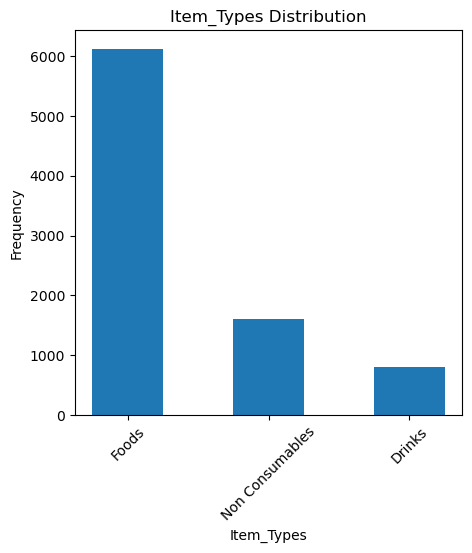

In [371]:
# Count the occurrences of each unique value in the 'Item_Type' column of the dataframe 'df_train'
# df_train['Item_Types'].value_counts()

# Create a bar plot using the counts of each item type
plt.bar(df_train['Item_Types'].value_counts().index, df_train['Item_Types'].value_counts(), width=0.5, bottom=None, align='center', data=df_train)

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Item_Types Distribution')
plt.xlabel('Item_Types')
plt.ylabel('Frequency')

# Set the rotation angle for the x-axis tick labels
plt.xticks(rotation=' 45')


# Display the plot
plt.show()

In [372]:
#Obtaining the unique values in 'Item_Fat_Content'
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### From the above values counts, we can see some irregularities  is clasess or catgories values listed in the 'Item_Fat_Content' column . Therefore, we recategorized the values into three categories which are 'Low Fat', 'Regular', 'None Edible' and then create a new columns 'Item_Fat_Contents'


In [373]:
# From the above unique values, we can see that there are actually two classes in 'Item_Fat_Content' column. 
# But some of the items are non consumables.  
#We recategorize the values inot three classes.

def item_fat(cols):
  fat=cols[0]
  typ=cols[1]
  
  if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (typ=='Foods' or typ=='Drinks'):
    return 'Low Fat'
  elif (fat=='Regular' or fat=='reg') and (typ=='Foods' or typ=='Drinks'):
    return 'Regular'
  else:
    return 'Non Edible'

In [374]:
#Creating additional column 'Item_Fat_Contents' into the train and test dataset
df_train['Item_Fat_Contents']=df_train[['Item_Fat_Content','Item_Types']].apply(item_fat,axis=1)
df_test['Item_Fat_Contents']=df_test[['Item_Fat_Content','Item_Types']].apply(item_fat,axis=1)

In [375]:
# Get the value counts of 'Item_Fat_Contents' column
df_train['Item_Fat_Contents'].value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Contents, dtype: int64

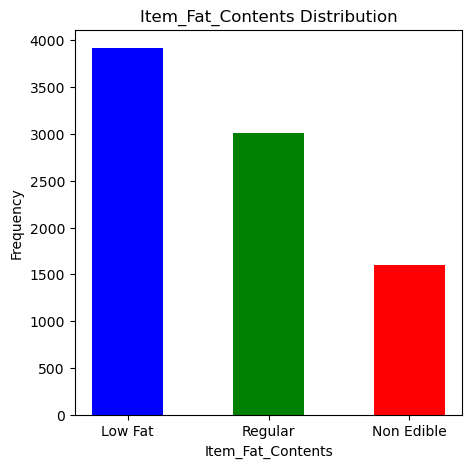

In [376]:
# Get the value counts of 'Outlet_Location_Type' column
value_counts = df_train['Item_Fat_Contents'].value_counts()
# Define a color palette for the bars
colors = ['blue', 'green', 'red']

# Create the bar chart with different colors
plt.bar(value_counts.index, value_counts, width=0.5, bottom=None, align='center', data=df_train, color=colors)

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Item_Fat_Contents Distribution')
plt.xlabel('Item_Fat_Contents')
plt.ylabel('Frequency')

# Display the plot
plt.show()




In [377]:
# Get the value counts of 'Outlet_Size' colum
df_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

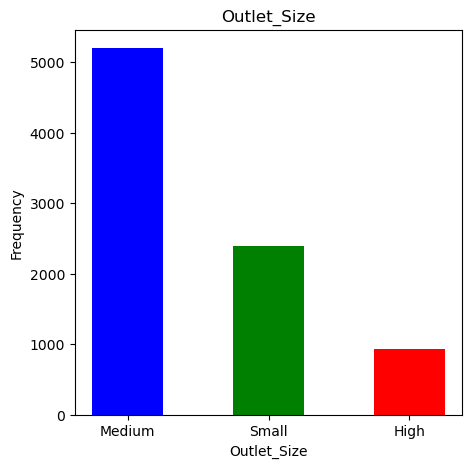

In [378]:
# Get the value counts of 'Outlet_Location_Type' column
value_counts = df_train['Outlet_Size'].value_counts()
# Define a color palette for the bars
colors = ['blue', 'green', 'red']

# Create the bar chart with different colors
plt.bar(value_counts.index, value_counts, width=0.5, bottom=None, align='center', data=df_train, color=colors)

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Outlet_Size')
plt.xlabel('Outlet_Size')
plt.ylabel('Frequency')

# Display the plot
plt.show()

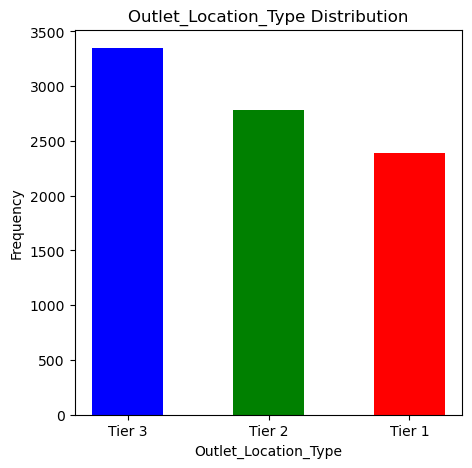

In [379]:
# Get the value counts of 'Outlet_Location_Type' column
value_counts = df_train['Outlet_Location_Type'].value_counts()

# Define a color palette for the bars
colors = ['blue', 'green', 'red']

# Create the bar chart with different colors
plt.bar(value_counts.index, value_counts, width=0.5, bottom=None, align='center', data=df_train, color=colors)

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Outlet_Location_Type Distribution')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

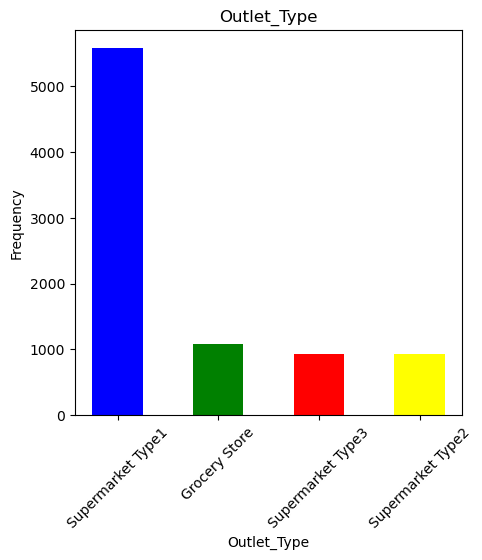

In [380]:
# Get the value counts of 'Outlet_Type' column
value_counts = df_train['Outlet_Type'].value_counts()

# Define a color palette for the bars
colors = ['blue', 'green', 'red', 'yellow']

# Create the bar chart with different colors
plt.bar(value_counts.index, value_counts, width=0.5, bottom=None, align='center', data=df_train, color=colors)

# Set the rotation angle for the x-axis tick labels
plt.xticks(rotation='45')

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Outlet_Type')
plt.xlabel('Outlet_Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [381]:
#Obtaining the unique values in 'Item_Visibility'
df_train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [382]:
#The column 'Item_Visibility' has lots of 0 values. We will fill this values with the mean value because it's has numberical values
df_train['Item_Visibility'].mask(df_train['Item_Visibility']== 0,df_train['Item_Visibility'].mean(),inplace=True)
df_test['Item_Visibility'].mask(df_test['Item_Visibility']== 0,df_test['Item_Visibility'].mean(),inplace=True)

In [383]:
#View the new Item_Visibility unique values
df_train['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

#### In the process of transforming our category data, we created additional category columns 'Item_Fat_Contents' and 'Item_Types'. This rendered the orignal columns 'Item_Fat_Content' and 'Item_Type' irrelivant for our analysis. Hence we drop them with other columns that would have no impact on the analysis

In [384]:
#Droping less important columns
df_train.drop(['Item_Fat_Content', 'Item_Type'], axis = 1, inplace = True)
df_test.drop(['Item_Fat_Content', 'Item_Type'], axis = 1, inplace = True)
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [385]:
df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Types,Item_Fat_Contents
0,9.30,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Foods,Low Fat
1,5.92,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,Regular
2,17.50,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Foods,Low Fat
3,19.20,0.066132,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,Foods,Regular
4,8.93,0.066132,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumables,Non Edible


In [386]:
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Types,Item_Fat_Contents
0,20.750000,0.007565,107.8622,1999,Medium,Tier 1,Supermarket Type1,Foods,Low Fat
1,8.300000,0.038428,87.3198,2007,Medium,Tier 2,Supermarket Type1,Foods,Regular
2,14.600000,0.099575,241.7538,1998,Medium,Tier 3,Grocery Store,Non Consumables,Non Edible
3,7.315000,0.015388,155.0340,2007,Medium,Tier 2,Supermarket Type1,Foods,Low Fat
4,12.695633,0.118599,234.2300,1985,Medium,Tier 3,Supermarket Type3,Foods,Regular


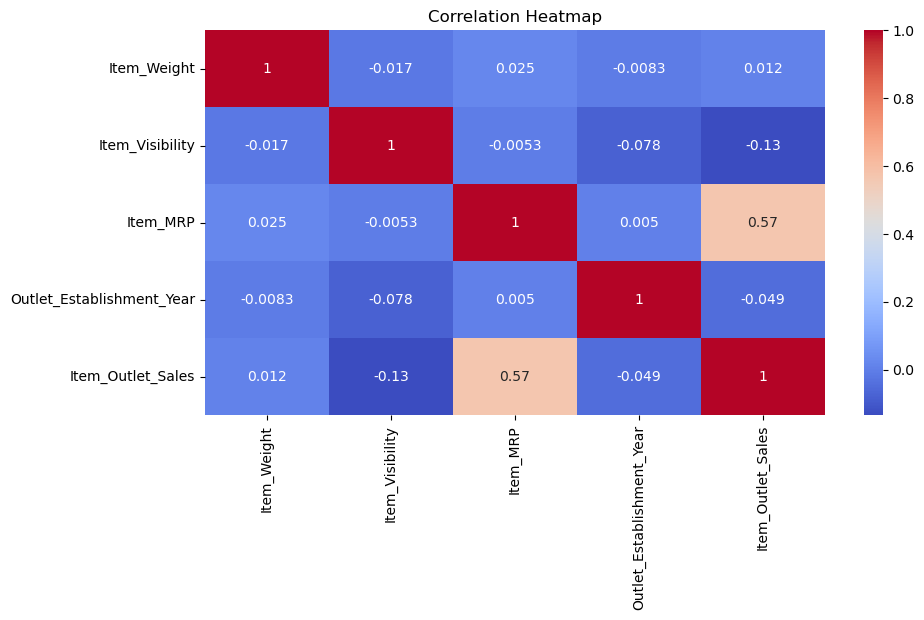

In [387]:
# Create a figure with a size of 10x5 inches
plt.figure(figsize =(10,5))

# Generate a correlation matrix for the dataframe 'df_train' and create a heatmap
sns.heatmap(df_train.corr(), annot = True,cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

# Preprocessing tasks before Model building

### Label Encoding

In [388]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


#### Machine learning require numerical input data, and therefore, we transformed the categorical variables into numerical form. This is to enable the machine learning algorithms to operate on the data. With label encoding on the category columns in our DataFrame, we are converting the categorical variables into numeric form, which allows us to include the variables in our machine learning analysis. This will ensures that the machine learning algorithms can process the data and make predictions or perform other tasks effectively. 

In [389]:
#Label encoding the category columns
df_train['Item_Fat_Contents']= le.fit_transform(df_train['Item_Fat_Contents'])
df_train['Item_Types']= le.fit_transform(df_train['Item_Types'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [390]:
df_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Types,Item_Fat_Contents
0,9.300,0.016047,249.8092,1999,1,0,1,3735.1380,1,0
1,5.920,0.019278,48.2692,2009,1,2,2,443.4228,0,2
2,17.500,0.016760,141.6180,1999,1,0,1,2097.2700,1,0
3,19.200,0.066132,182.0950,1998,1,2,0,732.3800,1,2
4,8.930,0.066132,53.8614,1987,0,2,1,994.7052,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0,2,1,2778.3834,1,0
8519,8.380,0.046982,108.1570,2002,1,1,1,549.2850,1,2
8520,10.600,0.035186,85.1224,2004,2,1,1,1193.1136,2,1
8521,7.210,0.145221,103.1332,2009,1,2,2,1845.5976,1,2


## Splitting our data into train and test
#### We will devide our df_train data frame into training data and test data. The training data = x_train and y_train. Test data (target variable) = x_test and y_test. We will train our model with x_train and y_train. Then our prediction is done with x_test and the result will be  compare with the y_test.

In [391]:
#Create a new dataframe 'X' by dropping the 'Item_Outlet_Sales' column from 'df_train'
X=df_train.drop('Item_Outlet_Sales',axis=1)

In [392]:
#Create a new series 'Y' by selecting the 'Item_Outlet_Sales' column from 'df_train'
Y=df_train['Item_Outlet_Sales']

In [393]:
#Import the necessary library for train-test split
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets.
#Set the random state to 101 for reproducibility
#Use a test size of 0.2, meaning 20% of the data will be used for testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# Standarization

In [394]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Types,Item_Fat_Contents
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,1.170832,1.112871,1.201220,1.093864,0.892995
std,4.226124,0.048742,62.275067,8.371760,0.600327,0.812757,0.796459,0.522090,0.895005
min,4.555000,0.003575,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.033085,93.826500,1987.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,12.857645,0.062517,143.012800,1999.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,16.000000,0.094585,185.643700,2004.000000,2.000000,2.000000,1.000000,1.000000,2.000000
max,21.350000,0.328391,266.888400,2009.000000,2.000000,2.000000,3.000000,2.000000,2.000000


In [395]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc= StandardScaler()

In [396]:
# Standardize the training data
# Fit the scaler to the training data and transform it
X_train_std= sc.fit_transform(X_train)

In [397]:
# Standardize the test data
# Transform the test data using the same scaler parameters
X_test_std= sc.transform(X_test)

In [398]:
# X_train_std contains the standardized training data
X_train_std

array([[ 1.52290029,  0.64168198, -1.38572402, ..., -0.25964107,
        -0.1812635 , -1.00667744],
       [-1.23985603, -0.18355316, -0.74452003, ..., -0.25964107,
        -2.08257821, -1.00667744],
       [ 1.54667616, -0.09174167,  0.41817984, ..., -0.25964107,
        -0.1812635 ,  1.23009192],
       ...,
       [-0.08197107, -1.05552925, -0.71089647, ..., -0.25964107,
         1.7200512 ,  0.11170724],
       [-0.74888428,  1.2014015 ,  1.3789714 , ..., -0.25964107,
        -0.1812635 ,  1.23009192],
       [ 0.67885683,  1.86333265, -1.33980862, ...,  0.98524841,
         1.7200512 ,  0.11170724]])

In [399]:
X_test_std

array([[-0.43860915, -0.31153777, -0.65315472, ...,  0.98524841,
         1.7200512 ,  0.11170724],
       [ 1.22570189, -0.6431177 ,  0.12220324, ..., -0.25964107,
        -0.1812635 , -1.00667744],
       [-1.21845775,  0.08937986, -1.01810874, ..., -0.25964107,
        -0.1812635 ,  1.23009192],
       ...,
       [ 0.65508096,  0.84649223,  0.70245529, ..., -1.50453056,
         1.7200512 ,  0.11170724],
       [ 1.01171904, -0.08680349, -0.42282015, ...,  0.98524841,
         1.7200512 ,  0.11170724],
       [-1.56558548, -1.23911865,  0.1558268 , ..., -0.25964107,
        -0.1812635 ,  1.23009192]])

In [400]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [401]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [402]:
import joblib

In [403]:
joblib.dump(sc,r'C:\Users\okwye\Office Tool\OneDrive\Desktop\Python_Projects\ML_BigMart_Sales_Prediction_sc.sav')

['C:\\Users\\okwye\\Office Tool\\OneDrive\\Desktop\\Python_Projects\\ML_BigMart_Sales_Prediction_sc.sav']

# Model Building
## LinearRegression

In [404]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [405]:
#Fit the model using the standardized training data X_train_std and the corresponding target values Y_train
lr.fit(X_train_std,Y_train)

LinearRegression()

In [406]:
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Types,Item_Fat_Contents
8179,11.00,0.055163,100.3358,2009,1,2,2,2,1
8355,18.00,0.038979,148.6418,1987,0,2,1,1,0
3411,7.72,0.074731,77.5986,1997,2,0,1,1,2
7089,20.70,0.049035,39.9506,2007,1,1,1,1,0
6954,7.55,0.027225,152.9340,2002,1,1,1,1,0


In [407]:
#Predict the target variable Y using the trained linear regression model
Y_pred_lr=lr.predict(X_test_std)

In [408]:
#Import the necessary libraries for performance evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [409]:
#Print the performance evaluation metrics
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5040146710915832
880.5414172207202
1162.6439381054322


In [410]:
#Save Model
joblib.dump(lr,r'C:\Users\okwye\Office Tool\OneDrive\Desktop\Python_Projects\ML_BigMart_Sales_Prediction_LinearRegression.sav')

['C:\\Users\\okwye\\Office Tool\\OneDrive\\Desktop\\Python_Projects\\ML_BigMart_Sales_Prediction_LinearRegression.sav']

## RandomForest

In [411]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [412]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [413]:
Y_pred_rf= rf.predict(X_test_std)

In [414]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5383601750292872
785.5680878660406
1121.6670189563454


# Hyper Parameter Tuning

In [415]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.504 (0.004) with: {'n_estimators': 10}
0.548 (0.006) with: {'n_estimators': 100}
0.550 (0.003) with: {'n_estimators': 1000}


In [416]:
#Print the best parameters found by the grid search for the random forest model
print(grid_search_forest.best_params_)

{'n_estimators': 1000}


In [417]:
#Print the best score achieved by the random forest model during the grid search
print(grid_search_forest.best_score_)

0.549823123338366


In [418]:
#Predict the target variable Y using the trained random forest model from grid search
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [419]:

r2_score(Y_test,Y_pred_rf_grid)

0.540278218800313

# Save model

In [420]:
import joblib

In [421]:
joblib.dump(grid_search_forest,r'C:\Users\okwye\Office Tool\OneDrive\Desktop\Python_Projects\ML_BigMart_Sales_Prediction_RandomForest.sav')

['C:\\Users\\okwye\\Office Tool\\OneDrive\\Desktop\\Python_Projects\\ML_BigMart_Sales_Prediction_RandomForest.sav']